In [6]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('bengaluru_house_prices.csv')

In [7]:
# Display the first few rows of the dataset
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [8]:
# Display summary statistics
print(df.describe())


               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [9]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [10]:
# Handling missing values
df = df.dropna()

# Convert size column to integer (assuming it's in the format "number BHK")
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Convert the "total_sqft" column to numerical values
# Since some values might be in ranges (e.g., "1000 - 1200"), we'll take the average
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

# Drop rows with missing values after conversion
df = df.dropna()

# Encoding categorical variables (e.g., location)
df = pd.get_dummies(df, drop_first=True)

print(df.head())

    size  total_sqft  bath  balcony   price  area_type_Carpet  Area  \
0      2      1056.0   2.0      1.0   39.07                   False   
1      4      2600.0   5.0      3.0  120.00                   False   
3      3      1521.0   3.0      1.0   95.00                   False   
5      2      1170.0   2.0      1.0   38.00                   False   
11     4      2785.0   5.0      3.0  295.00                   False   

    area_type_Plot  Area  area_type_Super built-up  Area  availability_15-Aug  \
0                  False                            True                False   
1                   True                           False                False   
3                  False                            True                False   
5                  False                            True                False   
11                  True                           False                False   

    availability_15-Dec  ...  society_Xeitaa   society_YCnce R  \
0                 Fa

In [11]:
# Creating a new feature: price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Dropping unnecessary columns
df = df.drop(columns=['price_per_sqft'])

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['total_sqft', 'bath', 'balcony', 'size']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())

        size  total_sqft      bath   balcony   price  area_type_Carpet  Area  \
0  -0.721930   -0.482894 -0.519408 -0.807898   39.07                   False   
1   2.007103    1.168406  2.885110  1.754700  120.00                   False   
3   0.642587    0.014421  0.615432 -0.807898   95.00                   False   
5  -0.721930   -0.360972 -0.519408 -0.807898   38.00                   False   
11  2.007103    1.366263  2.885110  1.754700  295.00                   False   

    area_type_Plot  Area  area_type_Super built-up  Area  availability_15-Aug  \
0                  False                            True                False   
1                   True                           False                False   
3                  False                            True                False   
5                  False                            True                False   
11                  True                           False                False   

    availability_15-Dec  ...  so

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)


In [16]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 24807239388.589024
Mean Squared Error: 1.3876009361933722e+22
R-squared: -1.0985053922219288e+18


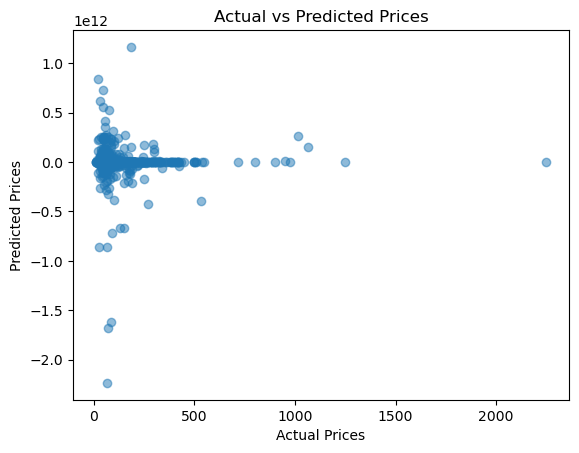

In [17]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

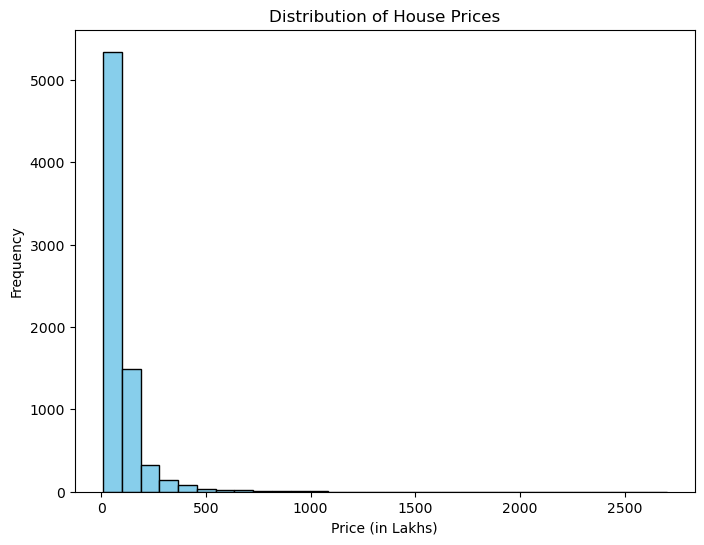

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of House Prices
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

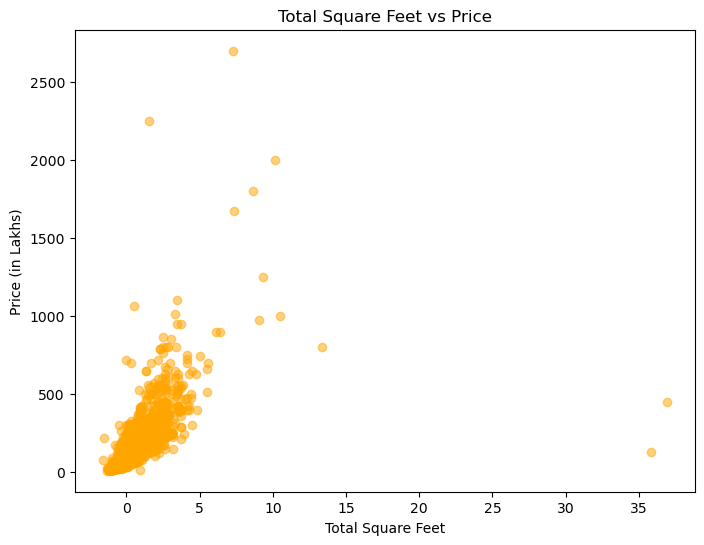

In [19]:
# Plot 2: Total Square Feet vs Price
plt.figure(figsize=(8, 6))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5, color='orange')
plt.title('Total Square Feet vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.show()

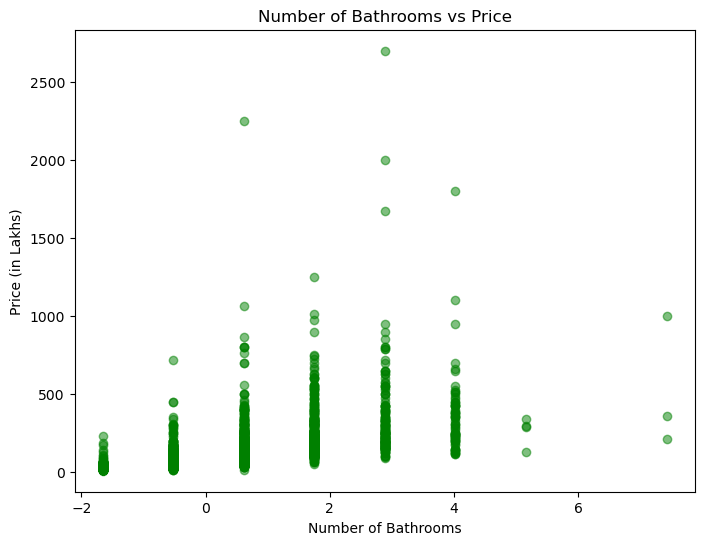

In [20]:
# Plot 3: Number of Bathrooms vs Price
plt.figure(figsize=(8, 6))
plt.scatter(df['bath'], df['price'], alpha=0.5, color='green')
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in Lakhs)')
plt.show()

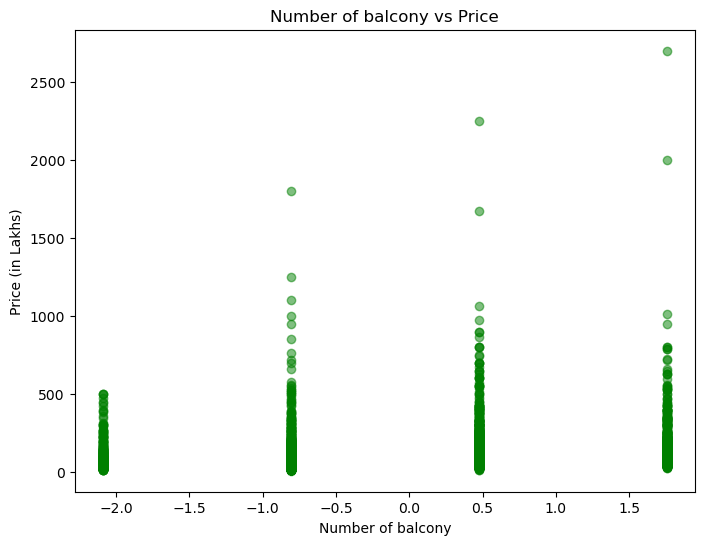

In [43]:
# Plot 3: Number of Bathrooms vs Price
plt.figure(figsize=(8, 6))
plt.scatter(df['balcony'], df['price'], alpha=0.5, color='green')
plt.title('Number of balcony vs Price')
plt.xlabel('Number of balcony')
plt.ylabel('Price (in Lakhs)')
plt.show()

In [23]:
print(df.columns)


Index(['size', 'total_sqft', 'bath', 'balcony', 'price',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'availability_15-Aug',
       'availability_15-Dec',
       ...
       'society_Xeitaa ', 'society_YCnce R', 'society_YMhenLi',
       'society_Yaenti ', 'society_ZeodsWo', 'society_Zonce E',
       'society_Zostaa ', 'society_i1ncyRe', 'society_i1odsne',
       'society_i1rtsCo'],
      dtype='object', length=3302)


C:\Users\vsanj\AppData\Local\Temp\ipykernel_24640\2875191996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='size', data=df, palette='Set2')


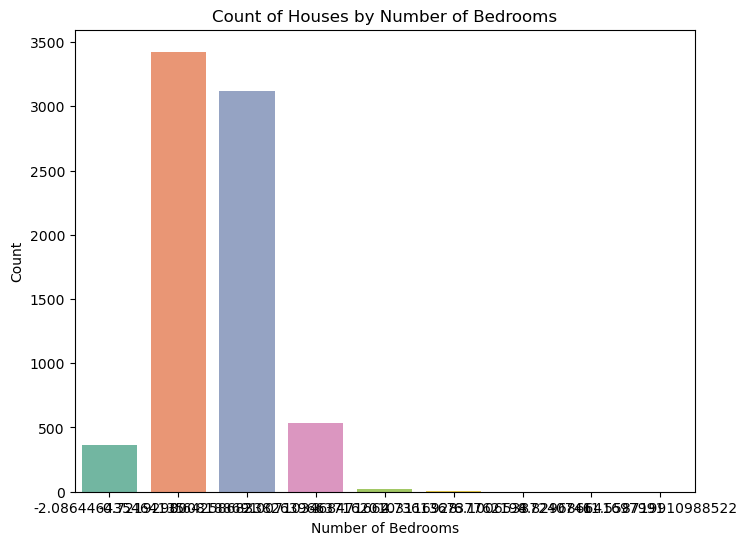

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='size', data=df, palette='Set2')
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

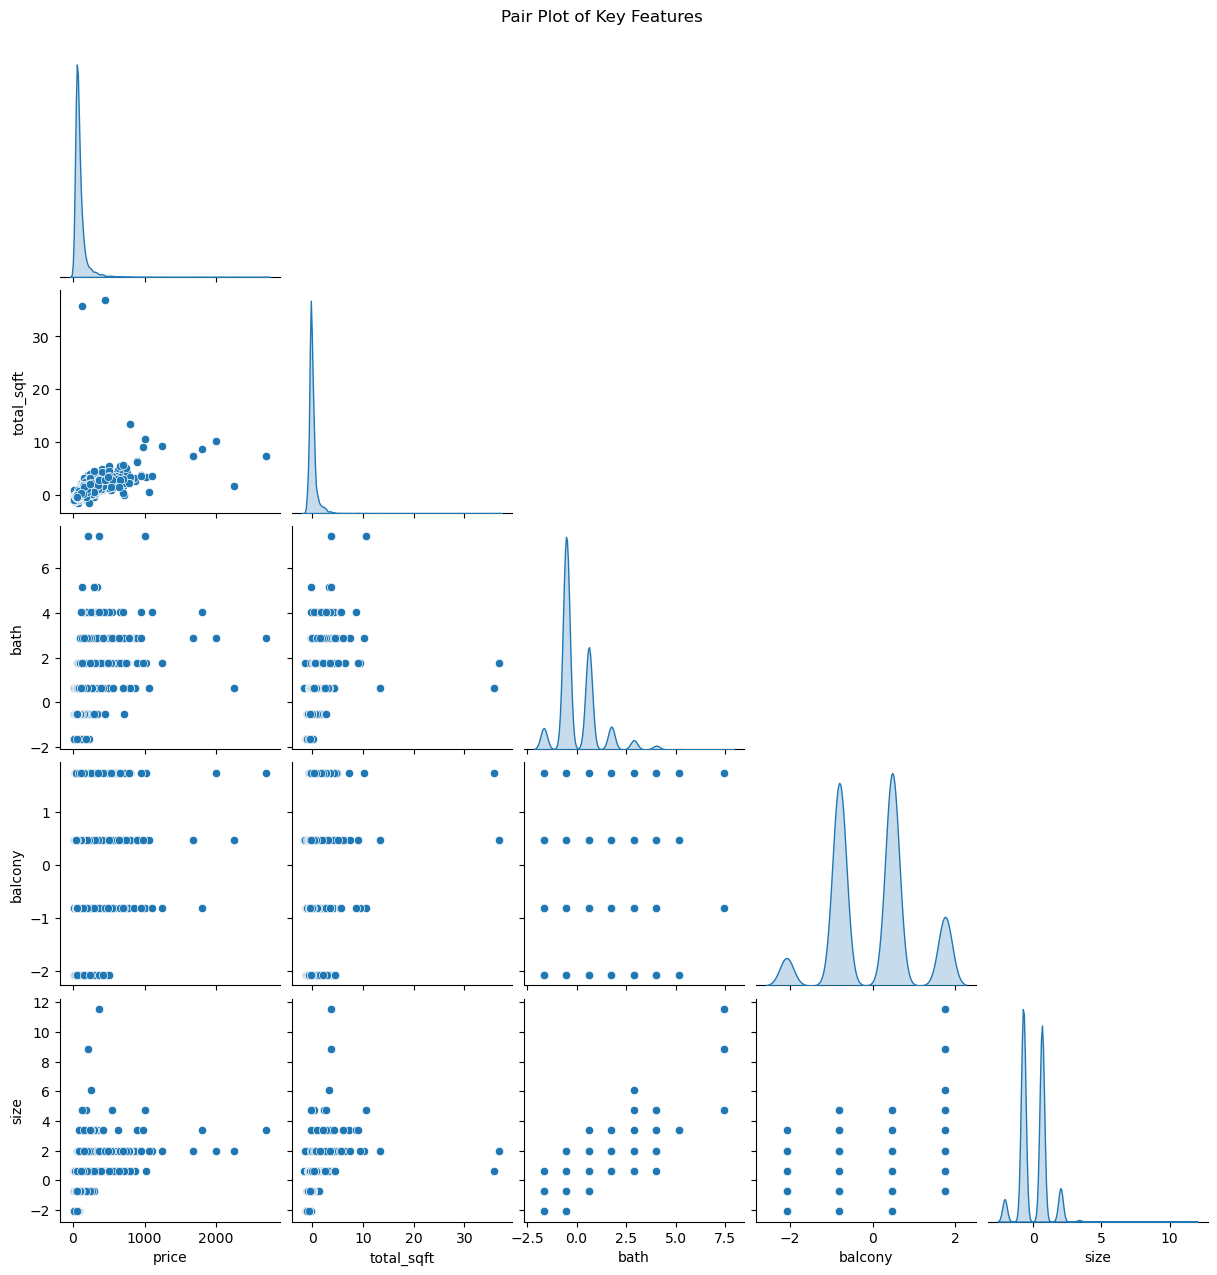

In [32]:
sns.pairplot(df[['price', 'total_sqft', 'bath', 'balcony', 'size']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

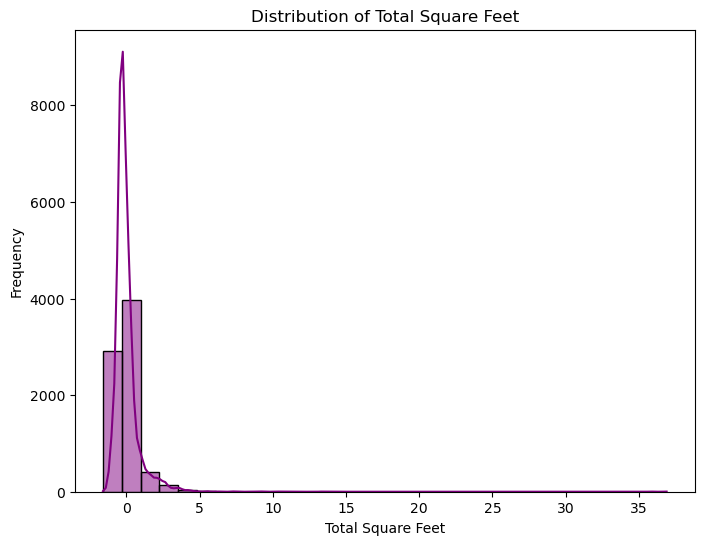

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_sqft'], bins=30, kde=True, color='purple')
plt.title('Distribution of Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.show()

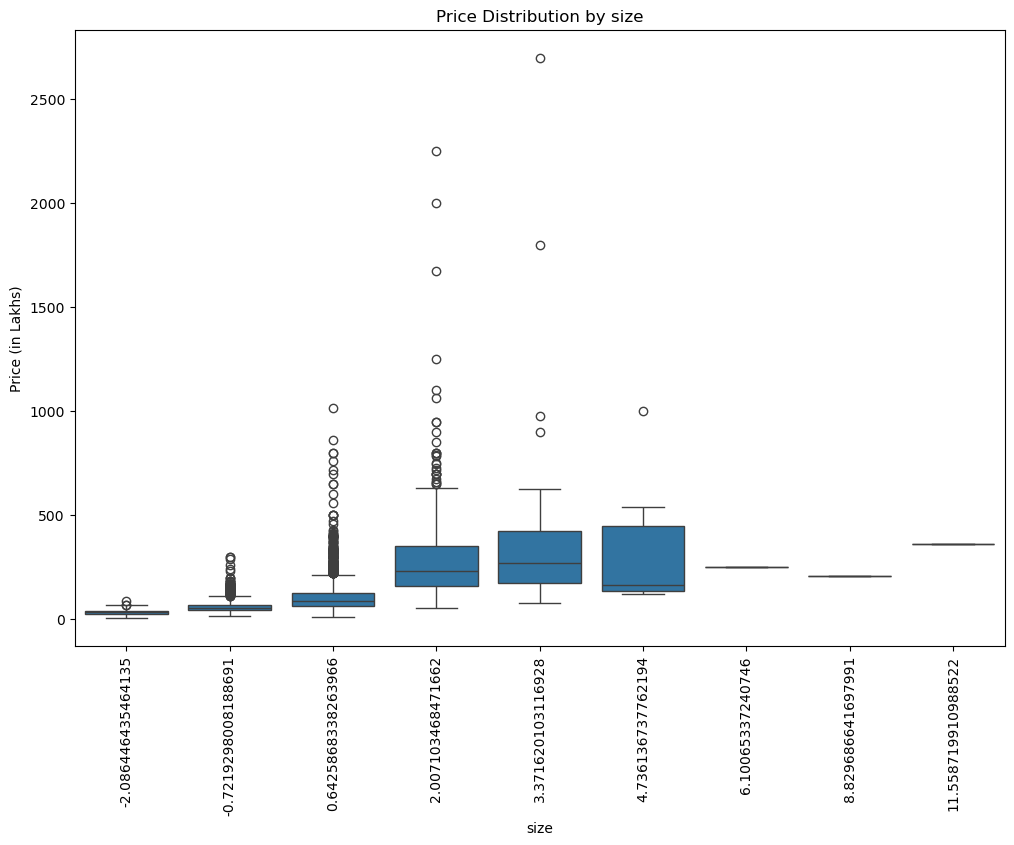

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='size', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by size')
plt.xlabel('size')
plt.ylabel('Price (in Lakhs)')
plt.show()
